# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pendahuluan](#pendahuluan)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Tahapan Proyek](#tahapan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#memuat_membaca)
    - [Memuat Seluruh Library](#memuat_library)
    - [Memuat Informasi data](#memuat_informasi)
        - [Memuat informasi data untuk taxi company](#tax_company)
        - [Memuat informasi data untuk perjalan pada tujuan chicago](#dropoff_chicago)
        - [Memuat informasi data untuk perjalan pada waktu dan cuaca](#weather_condition)
- [Pra-Pemrosesan Data](#)
    - [Memperbaiki data yang salah untuk tabel chicago](#)
    - [Melihat dan menganailisa nilai duplikasi pada data tabel perjalanan, kondisi cuaca, dan waktu](#)
    - [Melihat persebaran nilai pada data tabel perjalanan, kondisi cuaca, dan waktu](#)
- [Analisis Data Eksplorasi](#)
    - [Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran](#)
    - [Menampilkan Grafik](#)
        - [Membuat dan menampilkan grafik perusahaan taksi & jumlah perjalanan](#)
        - [Membuat dan menampilkan grafik 10 wilayah teratas yang dijadikan sebagai titik pengantaran](#)
- [Uji Hipotesis](#)
- [Ringkasan & Kesimpulan](#)
    - [Ringkasan](#)
    - [Kesimpulan](#)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita perlu merumuskan hipotesis yang kemudian dapat kita uji. Terkadang kita menerima hipotesis ini; tetapi terkadang kita juga menolaknya. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah asumsi yang dibuatnya benar atau tidak.

Dalam proyek ini, diminta untuk menemukan pola pada informasi yang berhubungan dampak faktor eksternal terhadap perjalan dengan preferensi penumpang. Serta menggunakan basis data untuk menganalisa data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

# Pengantar Proyek

Anda bekerja sebagai seorang analis untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugas Anda adalah untuk menemukan pola pada informasi yang tersedia. Anda ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Dengan menggunakan basis data, Anda akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

# Tujuan Proyek

Proyek ini ditujukan untuk menemukan pola pada informasi yang berhubungan dampak faktor eksternal terhadap perjalan dengan preferensi penumpang. Serta menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan dengan data dari komptetitor.

# Tahapan Proyek

Pertama-tama, melakukan analisa basis data dari web `https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html` untuk eksplorasi dan uji hipotesis sesuai permintaan pada SQL (dilakukan sebelum pyhton secara terpisah) untuk menemukan pola data yang diinginkan.

Data tentang suatu pola dalam perjalan di chicago hasil query pada SQL disimpan dalam berkas `project_sql_result_01.csv` dan berkas `project_sql_result_04.csv`. Tidak ada informasi tentang kualitas data, jadi perlu memeriksanya lebih dahulu untuk membuat grafik terhadap perjalanannya dan membuat kesimpulan.

Dan hasil query pada SQL disimpan dalam berkas `project_sql_result_07.csv` digunakan untuk hipotesis terkait perjalan cuaca ke bandara dan kondisi cuaca saat perjalan berlangsung.

## Memuat seluruh Library dan Membaca filenya

### Memuat seluruh Library

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
# Menyembunyikan warning
import warnings

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

Karena dataset-nya ada 3, maka untuk pengecekan kualitas data setiap masing-masing dataset perlu dilakukan secara satu per satu agar bisa dilakukan proses selanjutnya.

In [ ]:
# Memuat file sql result 1 menjadi taxi company
taxi_company = pd.read_csv('/datasets/project_sql_result_01.csv')

In [ ]:
# Memuat file sql result 4 menjadi chicago
chicago_destination = pd.read_csv('/datasets/project_sql_result_04.csv')

In [ ]:
# Memuat file sql result 7 menjadi trip weather duration
trip_weather_duration = pd.read_csv('/datasets/project_sql_result_07.csv')

### Memuat informasi data

#### Memuat informasi data untuk taxi company

In [ ]:
# Melihat data pada tabel taxi company
taxi_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [ ]:
# Melihat informasi keseluruhan pada tabel taxi company
taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Melihat jumlah nilai yang hilang untuk semua kolom
taxi_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
# Melihat jumlah nilai yang duplikasi pada tabel taxi company
taxi_company.duplicated().sum()

0

Setelah melihat semua informasi yang diperlukan, maka dapat disimpulkan untuk beberapa poin:

- tidak mempunyai masalah untuk kolom.
- tidak mempunyai masalah untuk tipe data.
- tidak mempunyai masalah untuk nilai hilang.
- tidak mempunyai masalah untuk duplikasi.

#### Memuat informasi data untuk perjalan pada tujuan chicago

In [ ]:
# Melihat data pada tabel daerah penurunan di chicago
chicago_destination

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [ ]:
# Melihat informasi keseluruhan pada tabel daerah penurunan di chicago
chicago_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Melihat jumlah nilai yang hilang untuk semua kolom daerah penurunan di chicago
chicago_destination.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
# Melihat jumlah nilai yang duplikasi pada daerah penurunan di chicago
chicago_destination.duplicated().sum()

0

Setelah melihat semua informasi yang diperlukan, maka dapat disimpulkan untuk beberapa poin:

- tidak mempunyai masalah untuk kolom.
- mempunyai masalah untuk tipe data pada kolom `average_trips`, karena average yang dimaksud adalah jumlah perjalanan (satuan perjalanan), bukan total perjalanan yang ditempuh (bukan dalam bentuk km atau mile).
- tidak mempunyai masalah untuk nilai hilang.
- tidak mempunyai masalah untuk duplikasi.

#### Memuat informasi data untuk perjalan pada waktu dan cuaca

In [ ]:
# Melihat data pada tabel perjalanan, cuaca, dan waktunya
trip_weather_duration

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [ ]:
# Melihat informasi keseluruhan perjalanan, cuaca, dan waktunya
trip_weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
# Melihat jumlah nilai yang hilang untuk semua kolom
trip_weather_duration.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
# Melihat jumlah nilai yang duplikasi pada daerah penurunan di chicago
trip_weather_duration.duplicated().sum()

197

Setelah melihat semua informasi yang diperlukan, maka dapat disimpulkan untuk beberapa poin:

- tidak mempunyai masalah untuk kolom.
- tidak mempunyai masalah untuk tipe data.
- tidak mempunyai masalah untuk nilai hilang.
- perlu melihat duplikasinya seperti apa, banyak asumsi untuk perjalanan yang sebenarnya bisa jadi kalau data itu tidak duplikasi.

Setelah semua tabel data dilihat,dipelajari, dan dianalisa bahwa tabel data hanya mengalami beberapa masalah kecil seperti pada tabel tujuan chicago yang jumlah perjalanannya mempunyai nilai desimal akibat tipe data pada tabel tersebut mengalami permsalahan. Sisanya untuk tabel data taxi company dan waktu cuaca tidak mengalami masalah.

## Pra-Pemrosesan Data

### Memperbaiki data yang salah untuk tabel chicago

karena ada yang salah untuk kolom `average_trips` pada kolom chicago yang dimana nilainya desimal sehingga membuat datanya menjadi tipe float, maka solusi terbaik untuk memperbaiki data tersebut dengan membulatkan nilai yang desimal ke bilangan keatas semua berapapun nilai desimalnya. Karena tidak mungkin nilai tersebut desimal.

In [ ]:
# Membulatkan nilai desimal dan tipe data pada kolom average_trips ke bilangan keatasnya
chicago_destination['average_trips'] = chicago_destination['average_trips'].apply(np.ceil).astype('int')

In [ ]:
# mengecek kembali data chicago
chicago_destination

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
...,...,...
89,Mount Greenwood,4
90,Hegewisch,4
91,Burnside,3
92,East Side,2


In [ ]:
# Mengecek tipe datanya
chicago_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


Untuk masalah pada tabel data chicago sudah diperbaiki dan siap untuk dilakukan proses selanjutnya. Dan nilainya sudah dibulatkan keatas

### Melihat dan menganailisa nilai duplikasi pada data tabel perjalanan, kondisi cuaca, dan waktu

In [ ]:
# Melihat jumlah nilai yang duplikasi pada data tabel perjalanan, kondisi cuaca, dan waktu
trip_weather_duration.duplicated().sum()

197

In [ ]:
# Melihat bagaimana nilai duplikasi seperti apa
trip_weather_duration.loc[trip_weather_duration.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Setelah melihat data yang duplikasi maka, ada penjelasan yang harus dijelaskan sebelum memutuskan solusi seperti apa untuk duplikasinya.

Adapun penjelasannya, yaitu:
- Bahwa setelah melihat datanya bahwa data tersebut bisa jadi ada beberapa taxi yang melakukan perjalanan dalam tanggal/jam keberangkatan, daerah, kondisi cuaca, dan durasi yang sama untuk segala kondisinya atau sebagian besar kondisinya adalah sama. Karena tidak mungkin sebuah perusahaan taxi hanya mempunyai satu taxi untuk melakukan operasi bisnisnya.

Jadi solusi yang saya lakukan berdasarkan analisa dan penjelasannya maka keputusan yang saya ambil adalah 'tidak akan di drop/hapus/dirubah'.

In [ ]:
# Melihat tipe data untuk data tabel perjalanan, kondisi cuaca, dan waktu
trip_weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


pada kolom `start_ts` tipe datanya adalah object, tetapi seharusnya adalah tipe data waktu. Maka perlu merubah tipe datanya.

In [ ]:
# Merubah tipe data untuk kolom start_ts
trip_weather_duration['start_ts'] = pd.to_datetime(trip_weather_duration['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Mengecek kembali untuk tipe datanya
trip_weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [ ]:
# Melihat persebaran data dari describe pada data tabel perjalanan, kondisi cuaca, dan waktu
trip_weather_duration.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


tipe data tidak bersamalah karena pada nilai 25% ada data yang perjalannya mempunyai milisecond/mili ddetik.

### Melihat persebaran nilai pada data tabel perjalanan, kondisi cuaca, dan waktu

Untuk proses uji hipotesis nanti, maka perlu melihat persebaran nilainya untuk mengidentifikasi apakah ada nilai ekstrim/outlier atau tidak agar nanti pada uji hipotesisnya tidak bermasalah.

In [ ]:
# distribusi nilai pada data tabel perjalanan, cuaca, waktu
trip_weather_duration.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

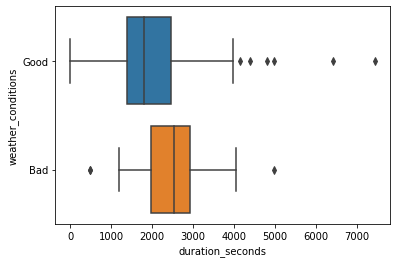

In [ ]:
# melihat persebaran data dengan boxplot
sns.boxplot(data=trip_weather_duration, x='duration_seconds', y='weather_conditions')

Untuk kondisi Good dan Bad terdapat nilai ekstrim/outlier, maka perlu dibersihkan nilai outliernya.

In [ ]:
# Membersihkan Outlier atau nilai Ekstrim
# Whiskers bawah adalah nilai yang lebih rendah dari kumpulan data yang berada dalam IQR
# Whiskers atas adalah nilai yang lebih tinggi dari kumpulan data yang berada dalam IQR 

Q1 = trip_weather_duration['duration_seconds'].quantile(0.25)
Q3 = trip_weather_duration['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

print('nilai Q1:', Q1)
print('nilai Q3:', Q3)
print('IQR:', IQR)
print('nilai whisker bawah:', lower_whisker)
print('nilai whisker atas:', upper_whisker)

nilai Q1: 1438.25
nilai Q3: 2580.0
IQR: 1141.75
nilai whisker bawah: -274.375
nilai whisker atas: 4292.625


In [ ]:
# membuat varibel baru yang dimana nilai outlier/ekstrim dihapus
trip_weather_duration_without_outlier = trip_weather_duration[(trip_weather_duration['duration_seconds'] >
                                                              lower_whisker) & 
                                                              (trip_weather_duration['duration_seconds'] <
                                                               upper_whisker)]

<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

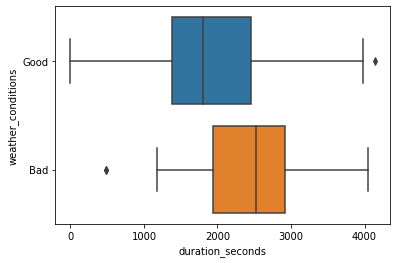

In [ ]:
# melihat persebaran data dengan boxplot dimana outlier/ekstrim kondisi sudah dihapus
sns.boxplot(data=trip_weather_duration_without_outlier, x='duration_seconds', y='weather_conditions')

Setelah dibersihkan untuk nilai outlier / nilai ekstrim bahwa persebaran nilai pada data tersebut jaduh lebih baik dan siap untuk dilakukan proses selanjutnya.

## Analisis Data Eksplorasi

### Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran

Perlu mengidentifikasi 10 wilayah teratas dengan cara mengidentifikasi rata-rata pengantaran/penurunan yang mempunyai rata-rata teratas sehingga dapat diketahui wilayahnya. 

In [ ]:
# Membuat variabel untuk mengidentifikasi nila rata-rata penurunan terbesarnya
average_trips_top_ten = chicago_destination.sort_values('average_trips', ascending=False).head(10)

In [ ]:
# Melihat hasilnya
average_trips_top_ten

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


Setelah melakukan identifikasi untuk melihat nilai rata-rata terbsesar untuk titik penurunan, maka didapatkan daerah-daerah chicago yang menjadi daerah 10 teratas untuk rata-rata titik penurnan terbesar. Adapun daerahnya sesuai urutaran, yaitu:

1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & DePaul

Dengan nilai teratas yaitu daerah `Loop` yang mempunyai rata-rata sebesar 10.728 dan daerah `Sheffield & DePaul` yang mempunyai rata-rata sebesar 1260 yang menjadi terbawah untuk 10 daerah pada selama bulan November 2017.

### Menampilkan Grafik

Diminta menampilkan grafik untuk perusahaan taksi & jumlah perjalanan dan 10 wilayah teratas berdasarkan jumlah pengantaran/penurunan.

#### Membuat dan menampilkan grafik perusahaan taksi & jumlah perjalanan

Karena terdapat 64 perusahaan taxi, maka akan mengambil 10 teratas saja untuk menampilkan grafiknya.

In [ ]:
# Membuat variabel untuk perusaahn taksi & jumlah perjalannya
top_10_taxi_company = taxi_company.sort_values('trips_amount', ascending=False).head(10)

In [ ]:
# Menampilkan hasil variabelnya untuk 10 teratas
top_10_taxi_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


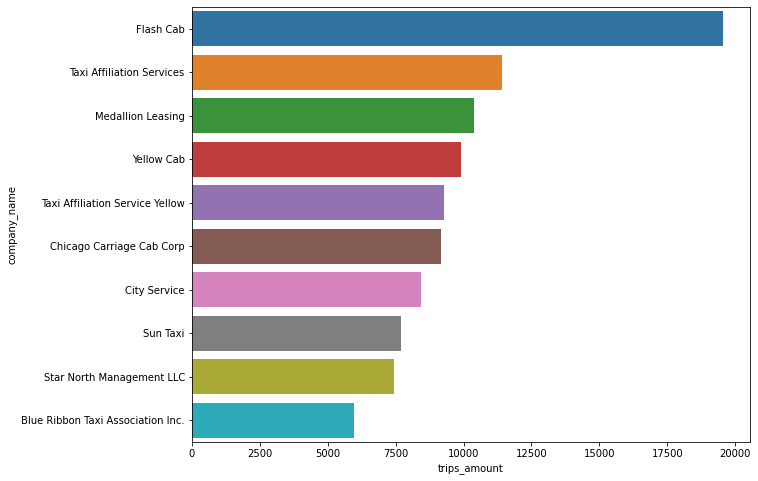

In [ ]:
# Membuat grafik untuk perusahaan taksi & jumlah perjalanannya
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_taxi_company, x='trips_amount', y='company_name', orient='h');

Setelah membuat grafiknya maka terlihat dengan jelas 10 perusahaan yang mempunyai jumlah perjalanan terbanyak pada tanggal 15-16 Novomber 2017, adapun perusahaaanya yaitu:

1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasing
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Cab Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.

Dengan nilai terbanyak pada perusahaan `Flas Cab` dengan nilai sebesar 19558 dan perusahaan `Blue Ribbon Taxi Association Inc.` dengan nilai sebesar 5953 dengan nilai paling sedikit untuk 10 perusahaan teratas.

#### Membuat dan menampilkan grafik 10 wilayah teratas yang dijadikan sebagai titik pengantaran

In [ ]:
# Melihat 10 wilayah teratas
average_trips_top_ten

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


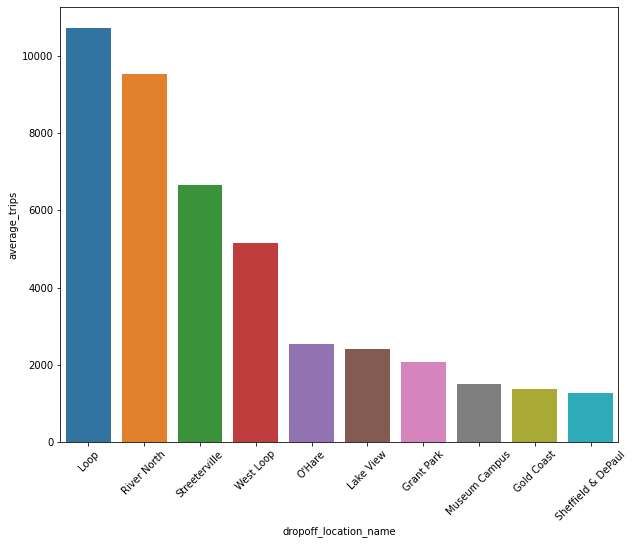

In [ ]:
# Membuat grafik untuk perusahaan taksi & jumlah perjalanannya
plt.figure(figsize=(10,8))
sns.barplot(data=average_trips_top_ten, x='dropoff_location_name', y='average_trips', orient='v')
plt.xticks(rotation=45);

Setelah membuat grafiknya maka terlihat dengan jelas 10 daerah chicago yang menjadi daerah 10 teratas untuk rata-rata titik penurunan dengan nilai rata-rata terbesar, adapun daerah penurunannya yaitu:

1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & DePaul

Dengan nilai teratas yaitu daerah `Loop` yang mempunyai rata-rata sebesar 10.728 dan daerah `Sheffield & DePaul` yang mempunyai rata-rata sebesar 1260 yang menjadi terbawah untuk 10 daerah pada selama bulan November 2017.

## Uji Hipotesis

Uji Hipotesis yang dilakukan adalah untuk tabel data perjalanan, cuaca, dan waktunya

Dengan nilai kolom-kolom yang ada di data tabel ini:

- start_ts — tanggal dan waktu penjemputan
- weather_conditions — kondisi cuaca saat perjalanan dimulai
- duration_seconds — durasi perjalanan dalam satuan detik

Standar yang digunakan untuk Uji-Hipotesis adalah 0.05 (5%). Karena itu merupakan standar terbaik untuk segala sektor dalam menguji hipotesisnya dan kebutuhan juga tidak terlalu mendesak atau penting, tetapi tidak terlalu santai karena digunakan untuk bisnis.

Uji Hipotesis(T-test) yang digunakan yaitu "Uji Hipotesis Persamaan Rata-Rata Dua Populasi". yang dimana uji ini membandingkan populasi dengan kondisi yang berbeda.

Dilakukan juga "Uji Levene" yang dimana merupakan uji secara ilmiah untuk membuktikan bahwa nilai varians sama atau tidak. Karena nanti akan berpengaruh kepada uji hipotesis dengan t-test rata-rata dua populasi dengan menentukan variansnya asumsi sama atau tidak untuk dua populasi tersebut.

Uji Hipotesis yang dilakukan untuk menguji asumsi "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan." untuk membandingan dengan kondisi bukan hujan.

Adapun pernyataan untuk membandingkan hujan atau tidak hujan
- Ketika kondisi pada kolom `weather_conditions` adalah `Good` maka artinya tidak hujan.
- Ketika kondisi pada kolom `weather_conditions` adalah `Bad` maka artinya hujan.

Maka adapun pernyataan untuk uji hipotesisnya, yaitu:

- **H0** : Perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah **SAMA**.

- **H1** : Perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah **TIDAK SAMA**.

In [ ]:
# mebuat variabel untuk menetukan hujan dan tidak hujan
# Good artinya tidak hujan
good_conditions = trip_weather_duration_without_outlier.query('weather_conditions == "Good"')

# Bad artinya hujan
bad_conditions = trip_weather_duration_without_outlier.query('weather_conditions == "Bad"')

In [ ]:
# uji varians
H0 = 'nilai varians antara hujan dan tidak hujan adalah sama.'
H1 = 'nilai varians antara hujan dan tidak hujan adalah tidak sama.'
alpha = 0.05

p_value_levene = st.levene(good_conditions['duration_seconds'],
                           bad_conditions['duration_seconds']).pvalue
print('p-value: ', p_value_levene)

if (p_value_levene < alpha):
    print(f'Tolak H0, artinya bahwa', H1)
else:
    print(f'Tidak bisa tolak H0, artinya bahwa', H0)

p-value:  0.6196707782686355
Tidak bisa tolak H0, artinya bahwa nilai varians antara hujan dan tidak hujan adalah sama.


In [ ]:
# menguji nilai varian secara manual
variance_good2 = np.var(good_conditions['duration_seconds'])
print(f'nilai varian untuk good:', variance_good2)
variance_bad2 = np.var(bad_conditions['duration_seconds'])
print(f'nilai varian untuk bad:', variance_bad2)

nilai varian untuk good: 497572.525999469
nilai varian untuk bad: 483684.220342686


In [ ]:
# uji hipotesis untuk rata-rata perjalan kondisi bad(hujan) dan good(tidak hujan)
H0 = "perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah sama."
H1 = "perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah tidak sama."

alpha = 0.05
results_weather = st.ttest_ind(good_conditions['duration_seconds'], 
                               bad_conditions['duration_seconds'], equal_var=True).pvalue
print('p-value:', results_weather)

if (results_weather < alpha):
    print(f'Tolak H0, artinya bahwa', H1)
else:
    print(f'Tidak bisa tolak H0, artinya bahwa', H0)

p-value: 1.2430038032744411e-13
Tolak H0, artinya bahwa perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah tidak sama.


Karena rata-rata perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah tidak sama. Mari buktikan dengan menghitung rata-ratanya untuk kondisi `Good` dan `Bad`.

In [ ]:
# Melihat rata-rata perjalanan secara manual
print(f'Rata-rata perjalan saat kondisi tidak hujan (Good) adalah:', good_conditions['duration_seconds'].mean(), f'detik')
print(f'Rata-rata perjalan saat kondisi hujan (Bad) adalah:', bad_conditions['duration_seconds'].mean(), f'detik')

Rata-rata perjalan saat kondisi tidak hujan (Good) adalah: 1979.2661381653454 detik
Rata-rata perjalan saat kondisi hujan (Bad) adalah: 2412.9441340782123 detik


Kesimpulan : Bahwa Uji-Hipotesis rata-rata perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah berubah dengan dikuatkan untuk penghitungan rata-rata secara manual untuk kondisi tidak hujan (Good) dan kondisi hujan (Bad) secara satu per-satu dan hasilnya adalah tidak sama.

## Ringkasan & Kesimpulan

### Ringkasan

Untuk menganalisa rata-rata perjalanan untuk 10 wilayah teratas pada titik pengantaran selama bulan November dan 10 perusahaan taksi dengan jumlah perjalanan terbanyak pada tanggal 15-16 Novermber 2017 dilakukan analisa eksplorasi dan pembautan grafik.

Untuk menganalisa apakah perjalan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan akan terdapat perubahan waktunya maka diperlukan Uji Hipotesis dengan rata-rata dua populasi,

### Kesimpulan

Bahwa pada rata-rata perjalanan untuk 10 wilayah teratas pada titik pengantaran selama bulan November dengan daerahnya sesuai berurutar, yaitu:

- Loop
- River North
- Streeterville
- West Loop
- O'Hare
- Lake View
- Grant Park
- Museum Campus
- Gold Coast
- Sheffield & DePaul

Dengan nilai teratas yaitu daerah Loop yang mempunyai rata-rata sebesar 10.728 dan daerah Sheffield & DePaul yang mempunyai rata-rata sebesar 1260 yang menjadi terbawah untuk 10 daerah pada selama bulan November 2017.

Bahwa 10 perusahaan yang mempunyai jumlah perjalanan terbanyak pada tanggal 15-16 Novomber 2017, adapun perusahaaanya secara berutan yaitu:

1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasing
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Cab Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.

Dengan nilai terbanyak pada perusahaan `Flas Cab` dengan nilai sebesar 19558 dan perusahaan `Blue Ribbon Taxi Association Inc.` dengan nilai sebesar 5953 dengan nilai paling sedikit untuk 10 perusahaan teratas.

Dari hasil uji hipotesis dengan menggunakan "Uji Levene" dan "Uji Hipotesis Persamaan Rata-Rata Dua Populasi" untuk menguji rata-rata perjalan daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu dalam kondisi hujan dan tidak hujan ditemukan, bahwa rata-rata perjalanan dari daerah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan mengalami perubahan. 